In [56]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [57]:
np.random.seed(31)
tf.set_random_seed(31)

In [58]:
#train data
train_X = np.linspace(0, 50, 50)
train_Y = np.linspace(0, 50, 50)
train_X += np.random.uniform(-4, 4, 50)
train_Y += np.random.uniform(-4, 4, 50)

# test data
test_X = np.linspace(0, 50, 25)
test_Y = np.linspace(0, 50, 25)
test_X += np.random.uniform(-4, 4, 25)
test_Y += np.random.uniform(-4, 4, 25)
n_train = len(train_X)
n_test = len(test_X)

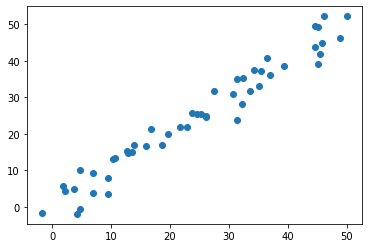

In [59]:
plt.scatter(train_X,train_Y,)
plt.show()

epoch:50 , cost:5.290904998779297 , W:1.0015865564346313 , b:0.47548797726631165 

epoch:100 , cost:5.290899753570557 , W:1.001617670059204 , b:0.47437983751296997 

epoch:150 , cost:5.290889263153076 , W:1.0016474723815918 , b:0.47328370809555054 

epoch:200 , cost:5.2908830642700195 , W:1.0016776323318481 , b:0.4722023904323578 

epoch:250 , cost:5.29087495803833 , W:1.0017069578170776 , b:0.47113582491874695 

epoch:300 , cost:5.290869235992432 , W:1.0017361640930176 , b:0.47008123993873596 

epoch:350 , cost:5.2908616065979 , W:1.0017647743225098 , b:0.46904075145721436 

epoch:400 , cost:5.29085636138916 , W:1.0017930269241333 , b:0.46801403164863586 

epoch:450 , cost:5.290852069854736 , W:1.0018213987350464 , b:0.4670027792453766 

epoch:500 , cost:5.290844440460205 , W:1.0018484592437744 , b:0.4660038948059082 

epoch:550 , cost:5.290841579437256 , W:1.001875877380371 , b:0.4650225043296814 

epoch:600 , cost:5.290836811065674 , W:1.0019028186798096 , b:0.4640530049800873 

epo

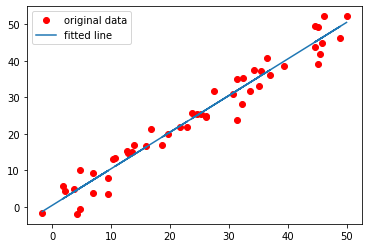

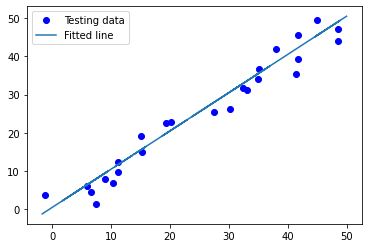

In [64]:
with tf.Graph().as_default():
    X = tf.placeholder('float')
    Y = tf.placeholder('float')
    W = tf.Variable(np.random.randn(), name='W')
    b = tf.Variable(np.random.randn(), name='b')
    lr = 0.001
    epochs = 1000
    pred = tf.add(tf.multiply(W,X),b)
    cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_train)
    optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost)
    init = tf.global_variables_initializer()
    
    with tf.Session() as session:
        session.run(init)

        for epoch in range(epochs):
            for (x,y) in zip(train_X, train_Y):
                session.run(optimizer, feed_dict={X:x, Y:y})
            
            if (epoch+1) % n == 0:
                c = session.run(cost, feed_dict={X:train_X, Y:train_Y})
                print('epoch:{} , cost:{} , W:{} , b:{} \n'.format(epoch+1, c, session.run(W), session.run(b)))
        c_train = session.run(cost, feed_dict={X:train_X, Y:train_Y})
        print("Optimization Finished!")
        print('epoch:{} , cost:{} , W:{} , b:{}'.format(epochs, c, session.run(W), session.run(b)))
        
        
        #display
        plt.plot(train_X, train_Y, 'ro', label='original data')
        plt.plot(train_X, session.run(W)*train_X + session.run(b), label='fitted line')
        plt.legend()
        plt.show()
        
        
        plt.plot(test_X, test_Y, 'bo', label='Testing data')
        plt.plot(train_X, session.run(W) * train_X + session.run(b), label='Fitted line')
        plt.legend()
        plt.show()
        
        
        
    
    